In [3]:
import os

training_dir = os.path.join('..', 'data', 'training')

print("Number of files per class (training) \n")
for Class in ['noisy']:
    class_dir = os.path.join(training_dir, Class)
    print(f"{Class}: {len([os.path.join(class_dir, _) for _ in os.listdir(class_dir) if _.endswith('.mat')])}")

training_dir = os.path.join('..', 'data', 'validation')

Number of files per class (training) 

noisy: 284


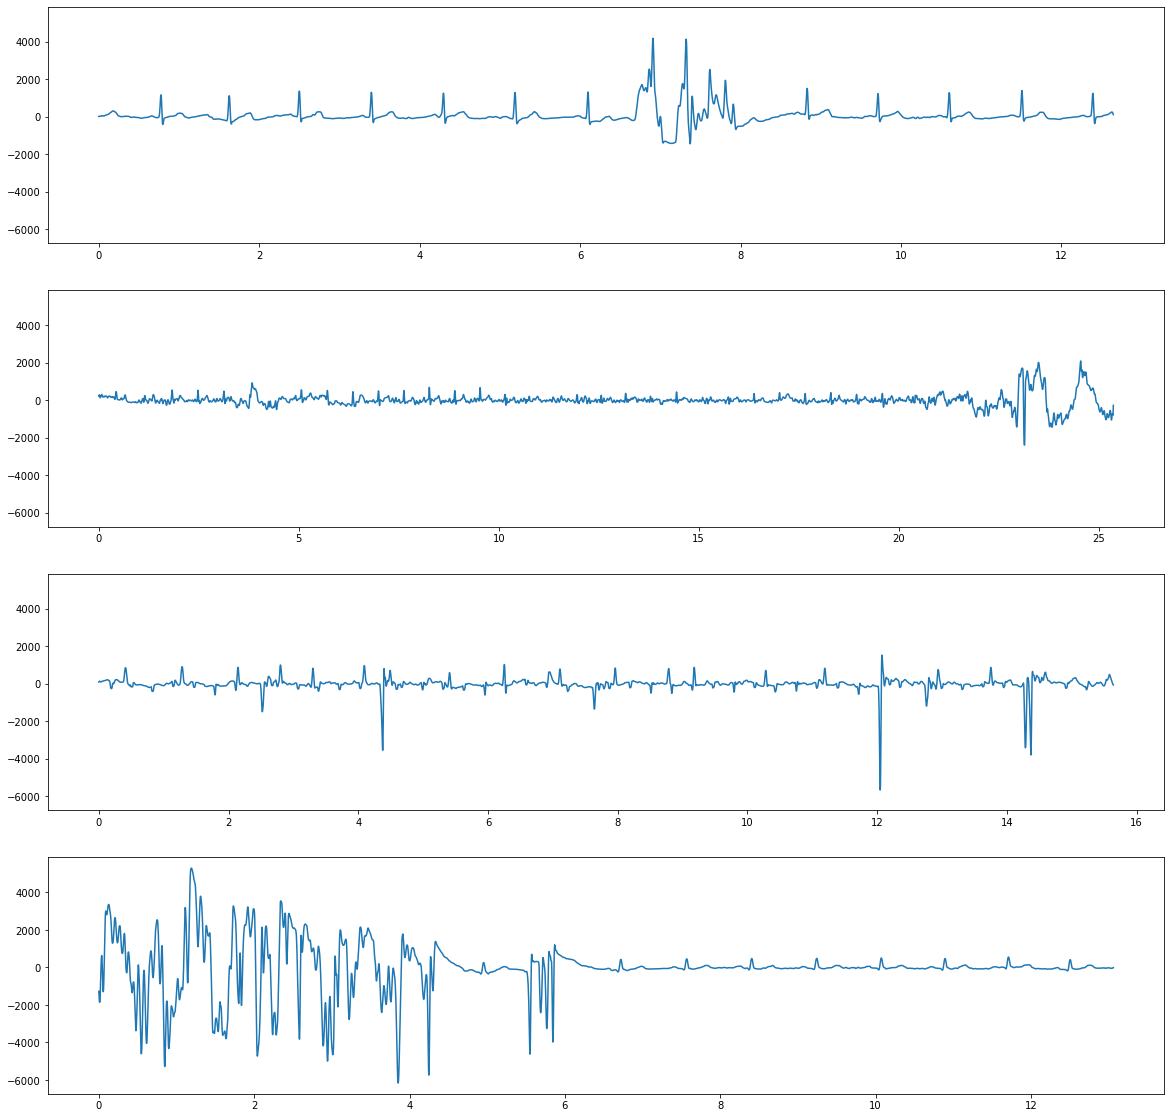

In [17]:
import sys
import scipy.io
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sampling_freq = 300
training_dir = os.path.join('..', 'data', 'training')
noisy_dir = os.path.join(training_dir, 'noisy')

fig, axs = plt.subplots(4, sharey=True)
fig.set_size_inches(20, 20)

data = []
for f in os.listdir(noisy_dir):
    if f.endswith(".mat"):
        file = os.path.join(noisy_dir, f)
        mat_data = scipy.io.loadmat(file)
        sequence = mat_data['val'][0]
        data.append(sequence)
        
idx = np.random.permutation(len(data))
data = np.array(data, dtype=object)[idx]

for i in range(4):
    time = np.linspace(0, len(data[i]) / sampling_freq, len(data[i]))
    axs[i].plot(time, data[i])